# COSC2753 - Assignment 1 - Length of Stay Prediction 

**RMIT University Vietnam**

**Course:** COSC2753

**Name:** Pham Cong Minh

**ID:** s3818102

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 16 April 2021

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')
pd.set_option('display.max_columns', 70)

## 2. Read train data & inspect

### 2.1 Read data

In [2]:
train_data = pd.read_csv('train_data.csv').drop(['ID', 'HealthServiceArea'], axis=1)

train_data.head()

Gender                    Race TypeOfAdmission  CCSProcedureCode  \
0      F              Other Race         Newborn               228   
1      M  Black/African American         Newborn               228   
2      M              Other Race         Newborn               220   
3      F              Other Race         Newborn                 0   
4      F              Other Race         Newborn               228   

   APRSeverityOfIllnessCode           PaymentTypology  BirthWeight  \
0                         1                  Medicaid         3700   
1                         1                  Medicaid         2900   
2                         1  Private Health Insurance         3200   
3                         1  Private Health Insurance         3300   
4                         1                  Medicaid         2600   

  EmergencyDepartmentIndicator  AverageCostInCounty  AverageChargesInCounty  \
0                            N                 2611                    9227   
1                            N                 3242                    8966   
2                            N                 3155                   11381   
3                            N                 3155                   11381   
4                            N                 2611                    9227   

   AverageCostInFacility  AverageChargesInFacility  AverageIncomeInZipCode  \
0                   1751                      8951                      45   
1                   3338                      6409                      34   
2                   4980                      9323                      45   
3                   5826                     15680                      59   
4                   6000                     14344                      59   

   LengthOfStay  
0             1  
1             1  
2             1  
3             1  
4             1

### 2.2 Inspect data

In [3]:
train_data.describe()

CCSProcedureCode  APRSeverityOfIllnessCode   BirthWeight  \
count      59966.000000              59966.000000  59966.000000   
mean         155.404229                  1.254594   3336.298903   
std           89.541978                  0.546207    446.244475   
min           -1.000000                  1.000000   2500.000000   
25%          115.000000                  1.000000   3000.000000   
50%          220.000000                  1.000000   3300.000000   
75%          228.000000                  1.000000   3600.000000   
max          231.000000                  4.000000   7500.000000   

       AverageCostInCounty  AverageChargesInCounty  AverageCostInFacility  \
count         59966.000000            59966.000000           59966.000000   
mean           2372.806690             7979.126922            2396.414318   
std             639.755096             3220.291347            1248.501189   
min             712.000000             1243.000000             457.000000   
25%            2041.000000             4620.000000            1551.000000   
50%            2533.000000             9227.000000            1967.000000   
75%            2785.000000            10644.000000            2895.000000   
max            3242.000000            11381.000000            8114.000000   

       AverageChargesInFacility  AverageIncomeInZipCode  LengthOfStay  
count              59966.000000            59966.000000  59966.000000  
mean                7958.472668               59.811143      2.538405  
std                 3859.294711               21.470170      1.171246  
min                 1120.000000               28.000000      1.000000  
25%                 4438.000000               45.000000      2.000000  
50%                 7945.000000               55.000000      2.000000  
75%                11619.000000               74.000000      3.000000  
max                18466.000000              115.000000     10.000000

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

In [5]:
train_data.shape

(59966, 14)

## 3. Data preprocessing and visualization

### 3.1 Convert LoS to binary targets

In [6]:
train_data['LengthOfStay'] = train_data['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)
train_data['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

### 3.2 Deep inspection to consider anomaly data point(s)

In [7]:
for col in train_data.columns:
    print(col)
    count = train_data[col].value_counts()
    percent = train_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   30978  51.66%
F   28987  48.34%
U       1    0.0%
--------------------------------
Race
                        Counts Percent
White                    32943  54.94%
Other Race               18314  30.54%
Black/African American    8183  13.65%
Multi-racial               526   0.88%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     58741  97.96%
Emergency     659    1.1%
Urgent        412   0.69%
Elective      154   0.26%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   19886  33.16%
 115   13628  22.73%
 0     11189  18.66%
 220   10773  17.97%
 231    2981   4.97%
-1       769   1.28%
 216     740   1.23%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   47953  79.97%
2    8760  14.61%
3    3252   5.42%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                    28723   47.9%
Private He

### 3.3 Plot the attributes of class 0 and 1

In [8]:
def Facet_Grid_sns(df):
    for c in df.columns:
        g = sns.FacetGrid(df, col='LengthOfStay',height =4, aspect = 2)
        g.map(plt.hist, str(c) ,bins=20)
        g.set_axis_labels(c, "Count")

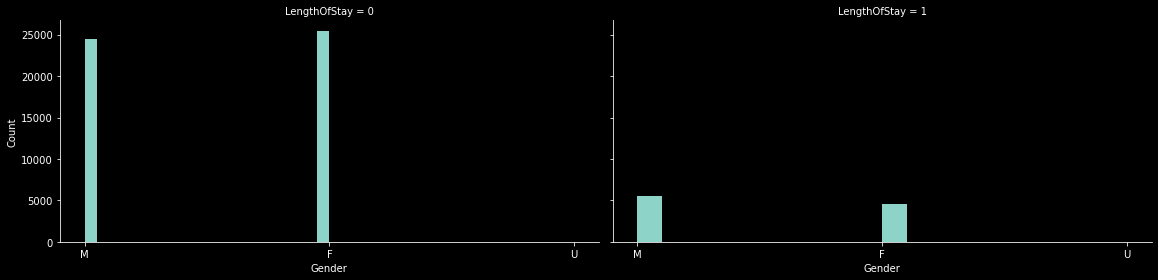

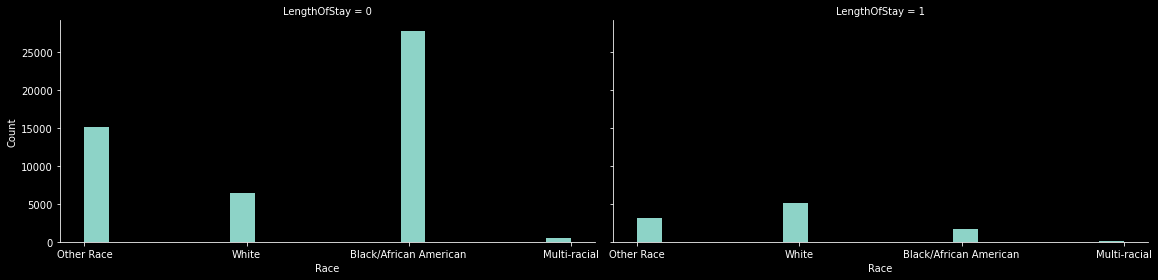

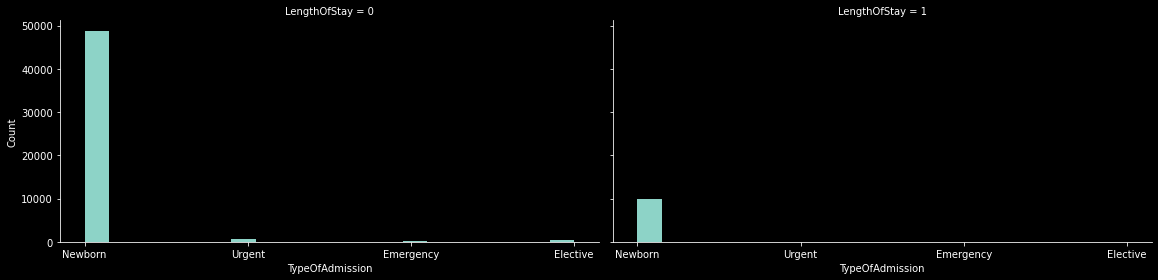

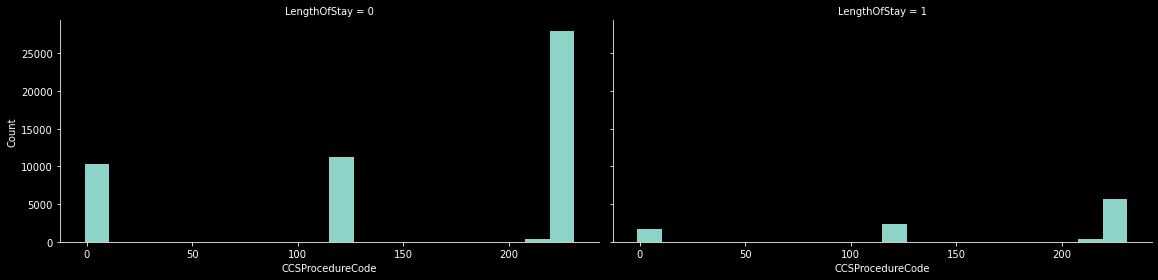

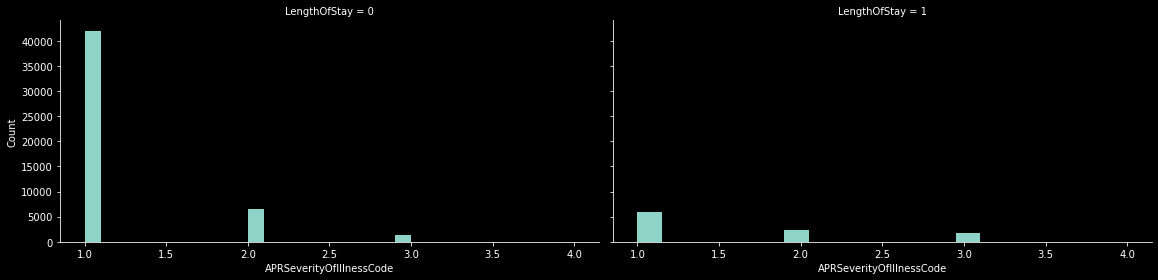

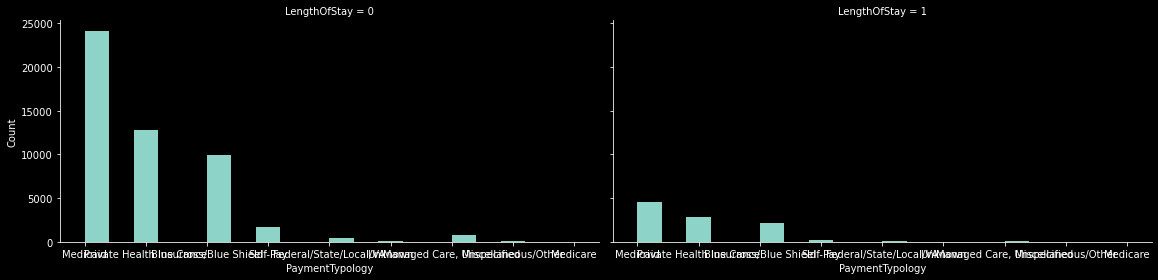

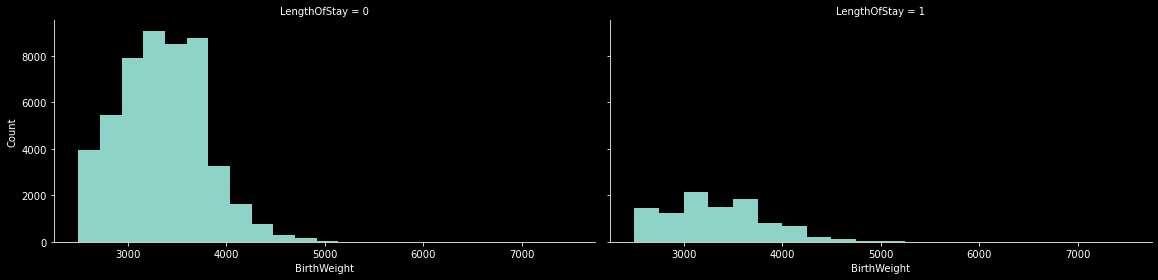

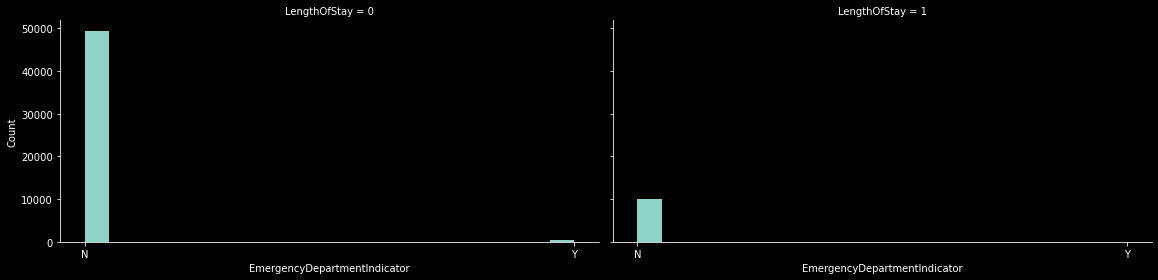

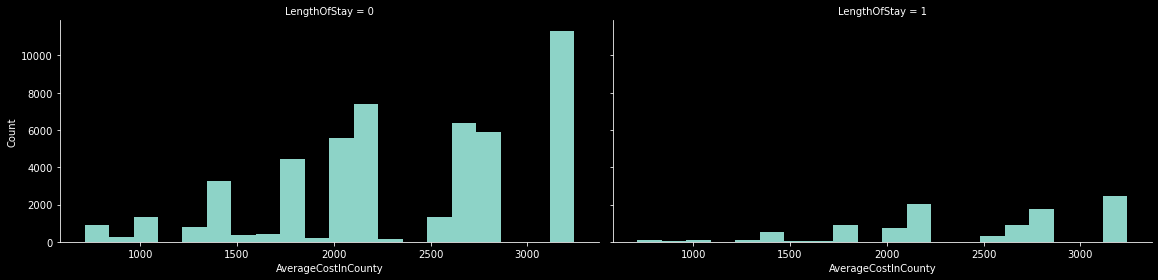

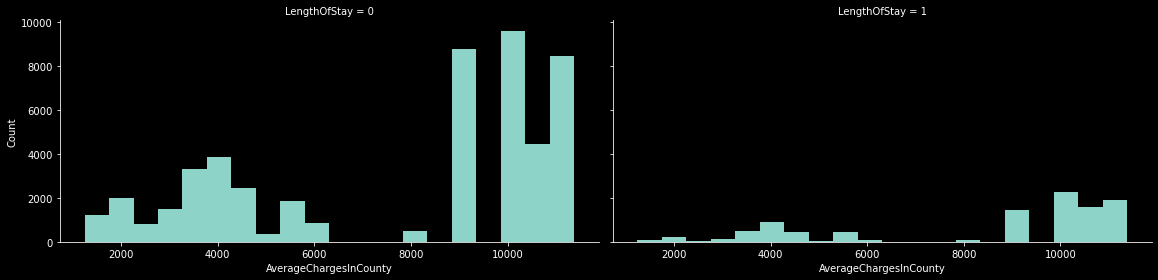

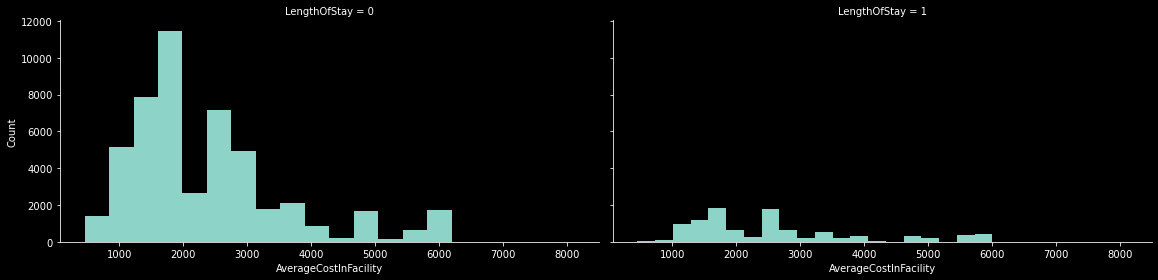

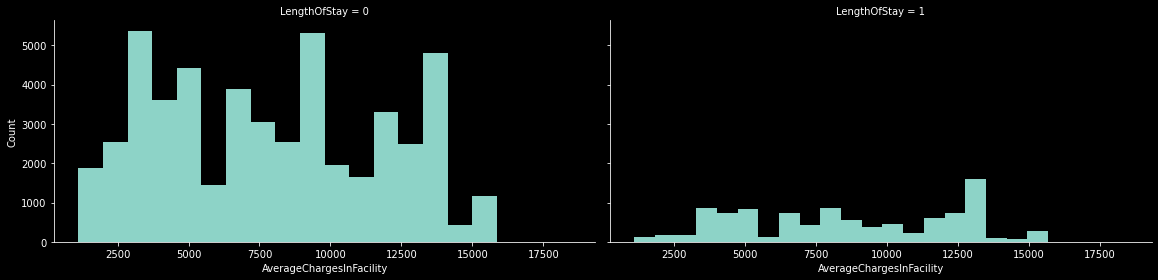

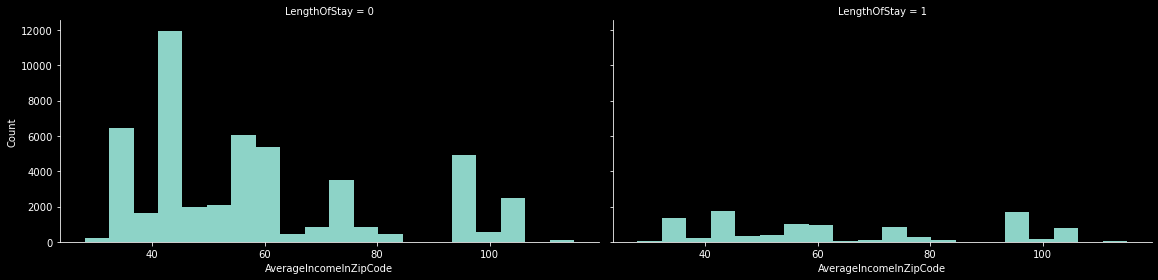

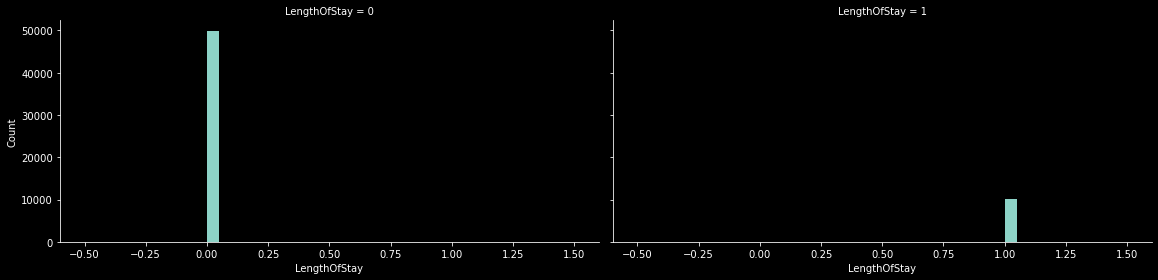

In [9]:
Facet_Grid_sns(train_data)

### 3.2 Split into X and y

In [10]:
X = train_data.drop('LengthOfStay', axis=1)
y = train_data['LengthOfStay']

/Users/taa/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


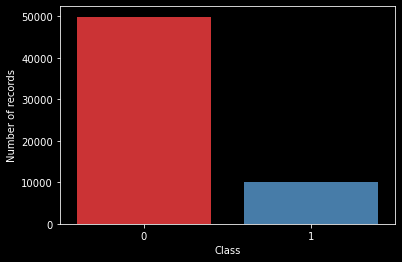

In [11]:
sns.countplot(y, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.show()

## 4. Encode norminal data

### 4.1.  Using pd.get_dummies()

In [12]:
X_copy = X.copy()
encode_col = ['Gender', 
              'Race',
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology', 
              'EmergencyDepartmentIndicator']

for col in encode_col:
    dummy = pd.get_dummies(X_copy[col])
    X_copy = pd.concat([X_copy, dummy], axis=1)
    X_copy = X_copy.drop(col, axis=1)

# Check X_copy
X_copy.columns

Index([ 'APRSeverityOfIllnessCode',               'BirthWeight',
             'AverageCostInCounty',    'AverageChargesInCounty',
           'AverageCostInFacility',  'AverageChargesInFacility',
          'AverageIncomeInZipCode',                         'F',
                               'M',                         'U',
          'Black/African American',              'Multi-racial',
                      'Other Race',                     'White',
                        'Elective',                 'Emergency',
                         'Newborn',                    'Urgent',
                                -1,                           0,
                               115,                         216,
                               220,                         228,
                               231,    'Blue Cross/Blue Shield',
          'Federal/State/Local/VA', 'Managed Care, Unspecified',
                        'Medicaid',                  'Medicare',
             'Miscellaneo

### 4.2. Drop outliner encoded-columns

<h3>Ordinal Encode 'Race'</h3>

White                    32943  54.94%
Other Race               18314  30.54%
Black/African American    8183  13.65%
Multi-racial               526   0.88%

In [13]:
# race_encode = {
#     'White': 4,
#     'Other Race': 3,
#     'Multi-racial': 2,
#     'Black/African American': 1
# }

Newborn     58741  97.96%
Emergency     659    1.1%
Urgent        412   0.69%
Elective      154   0.26%

In [14]:
# type_admission_encode = {
#     'Emergency': 4,
#     'Urgent': 3,
#     'Elective': 2,
#     'Newborn': 1
# }

In [15]:
# X_copy['Race'] = X_copy['Race'].apply(lambda x: race_encode[x])

In [16]:
# X_copy.head()

### 4.1 Plot heatmap for correlations (encoded data)

<AxesSubplot:>

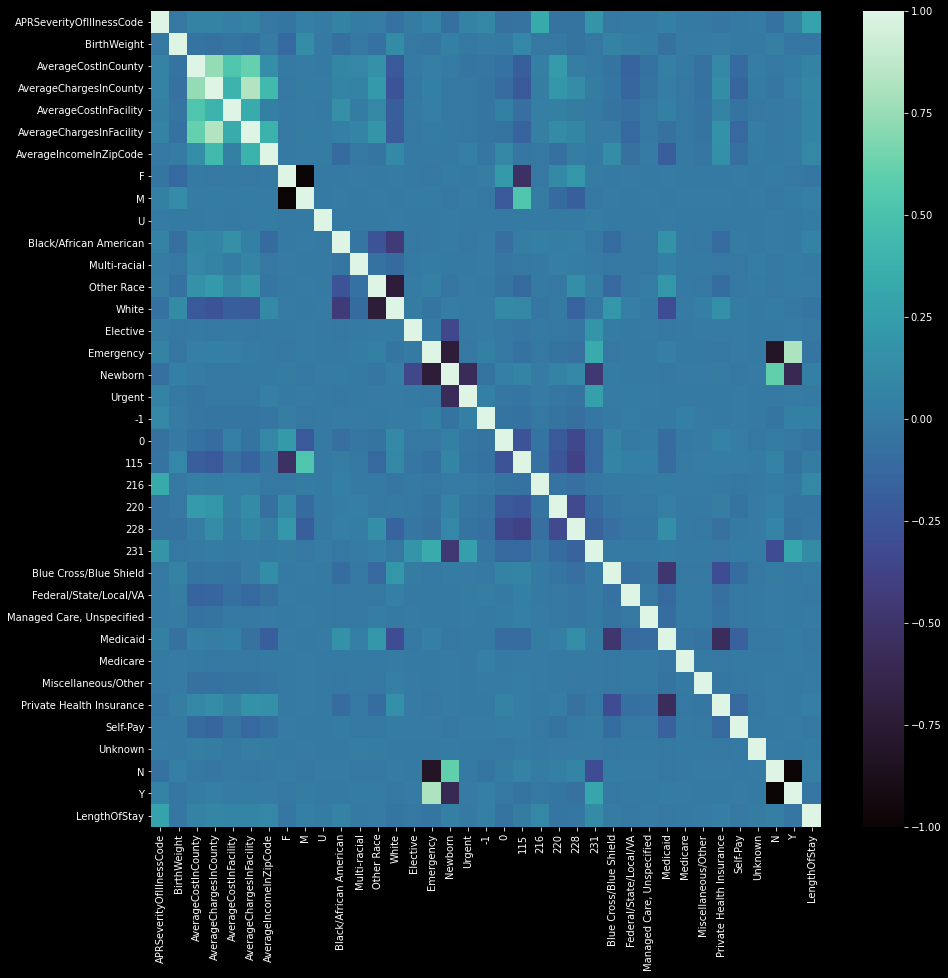

In [17]:
tmp = pd.concat([X_copy, y], axis=1)
correlations = tmp.corr()
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(correlations, ax = ax, cmap ='mako')

## 5. Split data into training and testing set

### 5.1 Split dataset

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.25, random_state = 2, stratify=y)

In [19]:
X_train

APRSeverityOfIllnessCode  BirthWeight  AverageCostInCounty  \
30691                         3         2600                 3155   
50762                         1         3900                 2611   
29845                         2         2700                 1860   
21852                         1         2600                 2018   
8701                          1         3400                 2777   
...                         ...          ...                  ...   
11936                         1         2600                 3155   
34101                         1         3500                 1445   
11723                         1         3600                 1826   
1274                          1         3000                 3155   
43632                         2         4000                 2041   

       AverageChargesInCounty  AverageCostInFacility  \
30691                   11381                   2895   
50762                    9227                   3790   
29845                    2846                   1860   
21852                    3610                   2018   
8701                     1587                   2777   
...                       ...                    ...   
11936                   11381                   3032   
34101                    3419                   1691   
11723                    4190                   1459   
1274                    11381                   3032   
43632                    9917                   1605   

       AverageChargesInFacility  AverageIncomeInZipCode  F  M  U  \
30691                     13394                      45  1  0  0   
50762                      6250                      45  1  0  0   
29845                      2846                      53  1  0  0   
21852                      3610                      52  0  1  0   
8701                       1587                      54  0  1  0   
...                         ...                     ... .. .. ..   
11936                     10135                     115  1  0  0   
34101                      3761                      36  0  1  0   
11723                      3505                      55  0  1  0   
1274                      10135                      84  0  1  0   
43632                     12083                      59  0  1  0   

       Black/African American  Multi-racial  Other Race  White  Elective  \
30691                       0             0           0      1         0   
50762                       1             0           0      0         0   
29845                       0             0           0      1         0   
21852                       0             0           1      0         0   
8701                        0             0           0      1         0   
...                       ...           ...         ...    ...       ...   
11936                       0             0           0      1         0   
34101                       0             0           0      1         0   
11723                       0             0           1      0         0   
1274                        0             0           0      1         0   
43632                       0             0           1      0         0   

       Emergency  Newborn  Urgent  -1  0  115  216  220  228  231  \
30691          0        1       0   0  0    0    0    0    1    0   
50762          0        1       0   0  1    0    0    0    0    0   
29845          0        1       0   0  0    0    0    0    1    0   
21852          0        1       0   0  0    1    0    0    0    0   
8701           0        1       0   0  0    1    0    0    0    0   
...          ...      ...     ...  .. ..  ...  ...  ...  ...  ...   
11936          0        1       0   0  0    0    0    1    0    0   
34101          0        1       0   0  0    1    0    0    0    0   
11723          0        1       0   0  0    0    0    0    1    0   
1274           0        1       0   0  0    1    0    0    0    0   
43632          0

### 5.2 Reset index

In [20]:
def df_reset_index(x):
    return x.reset_index().drop('index', axis = 1)

X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
y_train = df_reset_index(y_train)
y_test = df_reset_index(y_test)

In [21]:
X_train

APRSeverityOfIllnessCode  BirthWeight  AverageCostInCounty  \
0                             3         2600                 3155   
1                             1         3900                 2611   
2                             2         2700                 1860   
3                             1         2600                 2018   
4                             1         3400                 2777   
...                         ...          ...                  ...   
44969                         1         2600                 3155   
44970                         1         3500                 1445   
44971                         1         3600                 1826   
44972                         1         3000                 3155   
44973                         2         4000                 2041   

       AverageChargesInCounty  AverageCostInFacility  \
0                       11381                   2895   
1                        9227                   3790   
2                        2846                   1860   
3                        3610                   2018   
4                        1587                   2777   
...                       ...                    ...   
44969                   11381                   3032   
44970                    3419                   1691   
44971                    4190                   1459   
44972                   11381                   3032   
44973                    9917                   1605   

       AverageChargesInFacility  AverageIncomeInZipCode  F  M  U  \
0                         13394                      45  1  0  0   
1                          6250                      45  1  0  0   
2                          2846                      53  1  0  0   
3                          3610                      52  0  1  0   
4                          1587                      54  0  1  0   
...                         ...                     ... .. .. ..   
44969                     10135                     115  1  0  0   
44970                      3761                      36  0  1  0   
44971                      3505                      55  0  1  0   
44972                     10135                      84  0  1  0   
44973                     12083                      59  0  1  0   

       Black/African American  Multi-racial  Other Race  White  Elective  \
0                           0             0           0      1         0   
1                           1             0           0      0         0   
2                           0             0           0      1         0   
3                           0             0           1      0         0   
4                           0             0           0      1         0   
...                       ...           ...         ...    ...       ...   
44969                       0             0           0      1         0   
44970                       0             0           0      1         0   
44971                       0             0           1      0         0   
44972                       0             0           0      1         0   
44973                       0             0           1      0         0   

       Emergency  Newborn  Urgent  -1  0  115  216  220  228  231  \
0              0        1       0   0  0    0    0    0    1    0   
1              0        1       0   0  1    0    0    0    0    0   
2              0        1       0   0  0    0    0    0    1    0   
3              0        1       0   0  0    1    0    0    0    0   
4              0        1       0   0  0    1    0    0    0    0   
...          ...      ...     ...  .. ..  ...  ...  ...  ...  ...   
44969          0        1       0   0  0    0    0    1    0    0   
44970          0        1       0   0  0    1    0    0    0    0   
44971          0        1       0   0  0    0    0    0    1    0   
44972          0        1       0   0  0    1    0    0    0    0   
44973          0

## 6. Scale data

### 6.1 StandardScaler

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
y_train_ravel = y_train.values.ravel()

## 7. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=0)
logistic.fit(X_train_transform, y_train_ravel)

LogisticRegression(random_state=0)

In [24]:
from sklearn import metrics 

y_pred_logistic = logistic.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_logistic) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.61      0.15      0.25      2518

    accuracy                           0.84     14992
   macro avg       0.73      0.57      0.58     14992
weighted avg       0.81      0.84      0.80     14992



## 8. Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train_ravel)

GaussianNB()

In [26]:
y_pred_naive = gnb.predict(X_test)

print('Naive Bayes')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_naive) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_naive))

Naive Bayes
Accuracy: 82.28%
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12474
           1       0.46      0.33      0.39      2518

    accuracy                           0.82     14992
   macro avg       0.67      0.63      0.64     14992
weighted avg       0.80      0.82      0.81     14992



## 9. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
y_pred_tree = clf.predict(X_test)

print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 78.77%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12474
           1       0.35      0.30      0.32      2518

    accuracy                           0.79     14992
   macro avg       0.60      0.59      0.60     14992
weighted avg       0.78      0.79      0.78     14992



## 10. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
Rclf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
Rclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
y_pred_forest = Rclf.predict(X_test)

print('Random Forest')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_forest) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_forest))

Random Forest
Accuracy: 78.9%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12474
           1       0.35      0.30      0.32      2518

    accuracy                           0.79     14992
   macro avg       0.61      0.59      0.60     14992
weighted avg       0.78      0.79      0.78     14992



from sklearn.metrics import accuracy_score
## 11 XGBoost

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [33]:
!pip install xgboost

/bin/bash: pip: command not found


In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
y_train

In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
      "objective" : ["binary:logistic"]}

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = make_scorer(f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
# hyperParameterTuning(X_train,y_train_ravel)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
params = {
    'min_child_weight': 10.0,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.65,
    'num_boost_round' : 700
    }

In [ ]:
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=42)

In [ ]:
# Define the gini metric
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [ ]:
import xgboost as xgb

In [ ]:
y

<h2>Apply Test Dataset</h2>

In [ ]:
test_data = pd.read_csv("test_data.csv")
submission = pd.DataFrame(columns=['ID','LengthOfStay'])
submission['ID'] = test_data['ID']
test_data = test_data.drop(['ID','HealthServiceArea'], axis = 1)

test_data.head()

In [ ]:
for col in test_data.columns:
    print(col)
    count = test_data[col].value_counts()
    percent = test_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

In [ ]:
test_copy = test_data.copy()
encode_col = ['Gender', 
              'Race', 
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology', 
              'EmergencyDepartmentIndicator']
test_copy['PaymentTypology'] = test_copy['PaymentTypology'].replace(to_replace ="Department of Corrections", value = "Unknown")


for col in encode_col:
    dummy = pd.get_dummies(test_copy[col])
    test_copy = pd.concat([test_copy, dummy], axis=1)
#     if col == 'TypeOfAdmission':
#         missing_type = ["Trauma","Not Available"]
#         for t in missing_type:
#             if t not in test_copy.columns:
#                 test_copy[t] = 0
#         test_copy = test_copy.drop(col, axis=1)
#     else:
    test_copy = test_copy.drop(col, axis=1)

test_copy = test_copy.drop(['Trauma'], axis = 1)
# Check X_copy
test_copy.columns

In [ ]:
test_copy

In [ ]:
X_copy.columns = X_copy.columns.astype(str)

In [ ]:
test_copy.columns = test_copy.columns.astype(str)

In [ ]:
y_new = pd.DataFrame(y)

In [ ]:
submission

In [ ]:
sub = pd.DataFrame()
sub['id'] = submission['ID']
sub['LengthOfStay'] = np.zeros_like(submission.ID.values)

In [ ]:
sub

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X_copy, y)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X_copy.iloc[train_index], X_copy.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    # Convert our data into XGBoost format
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test_copy)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    # Train the model! We pass in a max of 1,600 rounds (with early stopping after 70)
    # and the custom metric (maximize=True tells xgb that higher metric is better)
    mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=70, feval=gini_xgb, maximize=True, verbose_eval=100)

    print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
    # Predict on our test data
    p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
    sub['LengthOfStay'] += p_test/kfold

In [ ]:
# Change the threshold for filtering gini index (higher may means better!!!)
sub.loc[sub['LengthOfStay'] >= 0.515]

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.distplot(sub['LengthOfStay'])

In [ ]:
sub['LengthOfStay'] = sub['LengthOfStay'].apply(lambda x: 1 if x >= 0.515 else 0)

In [ ]:
sub['LengthOfStay'].value_counts()

In [ ]:
sub.to_csv('test_gini_threshold.csv', index=False)

In [ ]:
# from xgboost import XGBClassifier

# # xgb = XGBClassifier(learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic')
# xgb = XGBClassifier(params**)
# # learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic'
# # learning_rate = 0.1, max_depth = 7, min_child_weight = 5, gamma=  0.0, colsample_bytree =0.4, objective = 'binary:logistic'
# xgb.fit(X_train, y_train)

In [ ]:
# y_xgb = xgb.predict(X_test)

# print('XGBoostClassifier')
# print('Accuracy: {facc}%'.format(facc=round(accuracy_score(y_test, y_xgb) * 100, 2)))
# print(classification_report(y_test, y_xgb))

In [ ]:
# from xgboost import plot_importance

# plot_importance(xgb, max_num_features = 30)
# plt.figure(figsize=(50,50))
# plt.show()

## 12 Apply on Test dataset

In [ ]:
# # test_transform = scaler.transform(test_copy)

# pred_xgb = xgb.predict(test_copy)
# # pred_log = logistic.predict(test_transform)

# pred_xgb

In [ ]:
# u,c = np.unique(pred_xgb, return_counts = True)
# # u1,c1 = np.unique(pred_log, return_counts = True)
# # print(dict(zip(u,c)))
# # print(dict(zip(u1,c1)))
# u,c

In [ ]:
# submission['LengthOfStay'] = pd.Series(pred_xgb)

# submission.to_csv('test_xgb_3.csv',index=False)